Testing Mushi
==

Here's a notebook for playing with the `mushi` module

API documentation can be viewed with
```python
help(PiecewiseConstantHistory)
help(JointHistory)
help(SFS)
```

In [1]:
%matplotlib notebook
import mushi
from mushi import PiecewiseConstantHistory, JointHistory, SFS
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
import time

### Demographic history $\eta(t)$ and mutation rate history $\mu(t)$

<IPython.core.display.Javascript object>


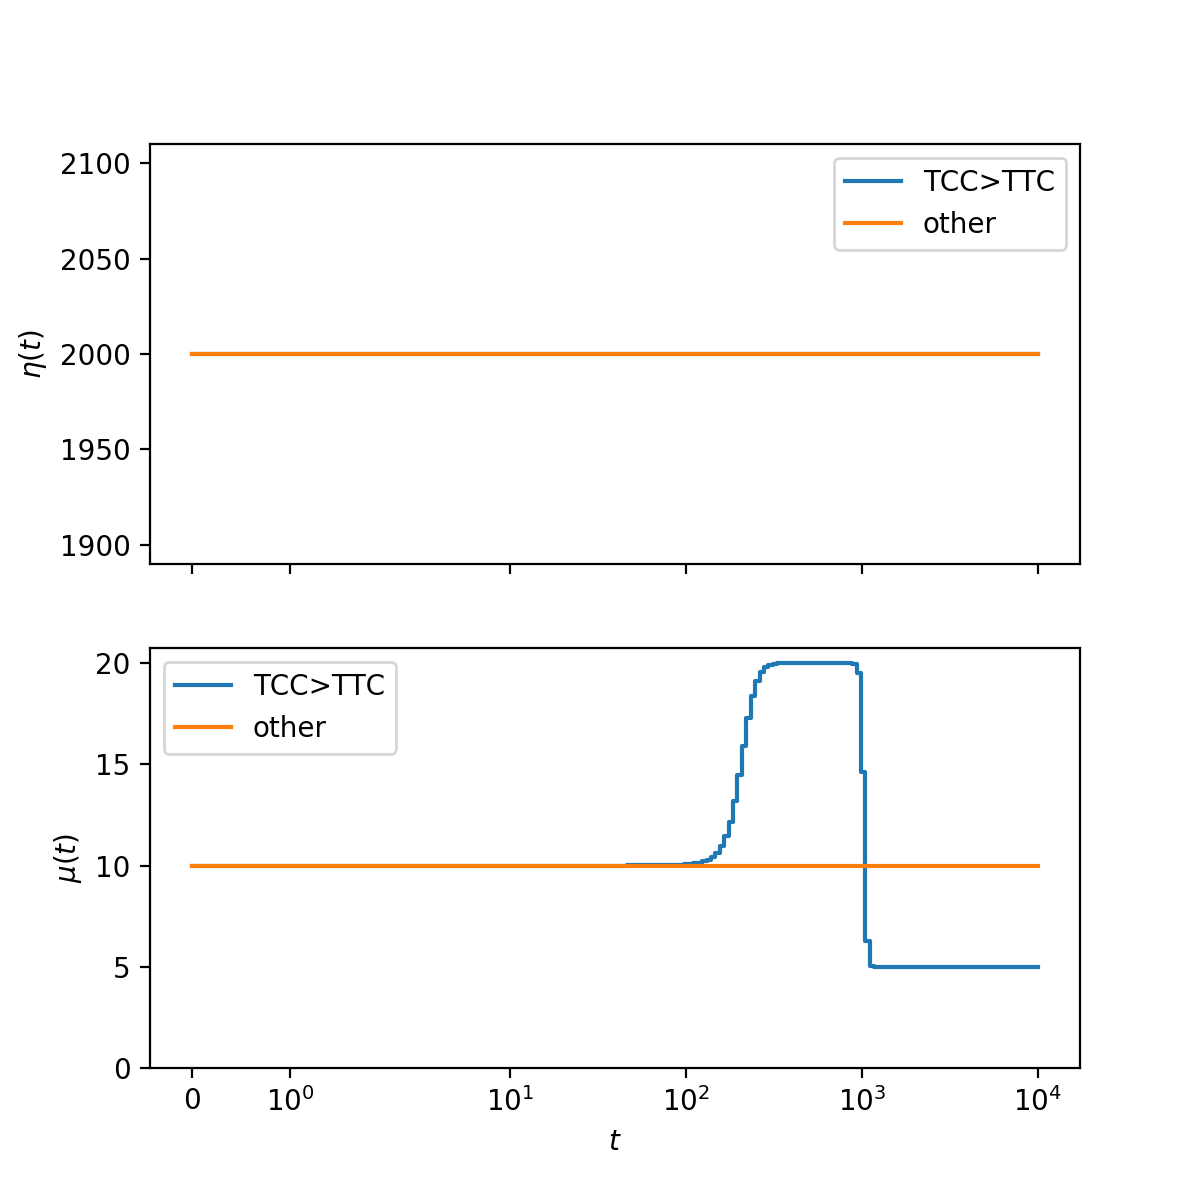

In [2]:
t = np.logspace(-1, 4, 200)

y = 2000 * np.ones(len(t) + 1)
η = PiecewiseConstantHistory(t, y)

z_flat = np.ones(len(t) + 1)
z_pulse = np.ones(len(t) + 1)
z_pulse[1:] += expit(.05 * (t - 200)) - 1.5 * expit(.05 * (t - 1000))
μ_TCC = PiecewiseConstantHistory(t, 10 * z_pulse)
μ_other = PiecewiseConstantHistory(t, 10 * z_flat)

history_TCC = JointHistory(η, μ_TCC)
history_other = JointHistory(η, μ_other)

fig = history_TCC.plot(label='TCC>TTC')
history_other.plot(fig=fig, label='other')
plt.show()

### SFS

In [3]:
n = 200
sfs_TCC = SFS(n)
sfs_other = SFS(n)
sfs_TCC.simulate(history_TCC)
sfs_other.simulate(JointHistory(η, μ_other))

### Invert the `TCC>TTC` SFS conditioned on $\eta(t)$ to get $\mu(t)$

elapsed time 31.95


<IPython.core.display.Javascript object>


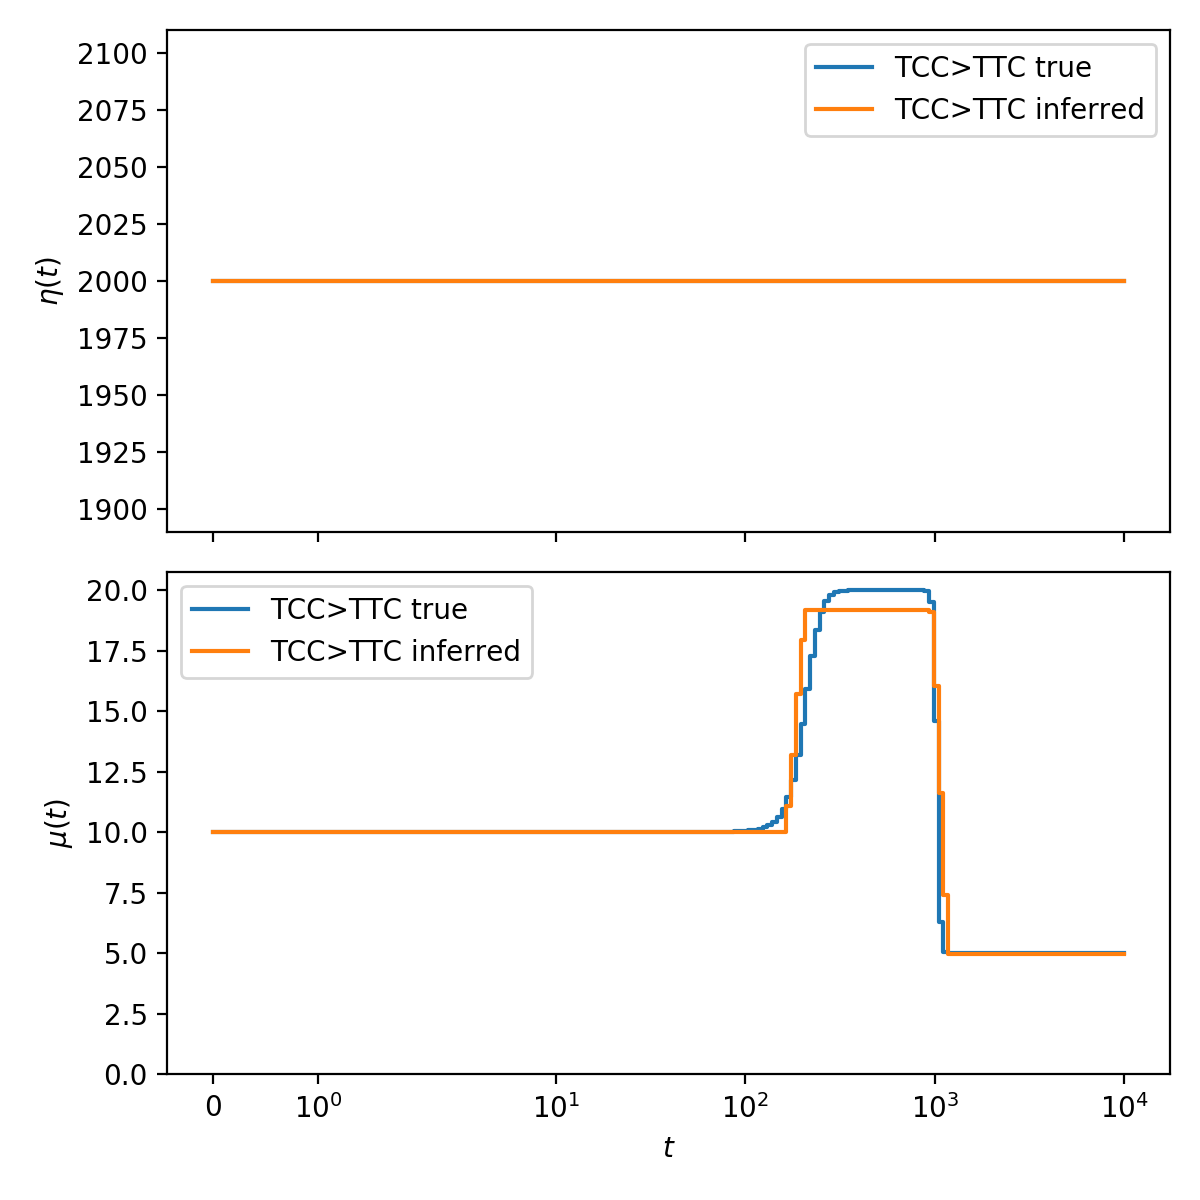

<IPython.core.display.Javascript object>


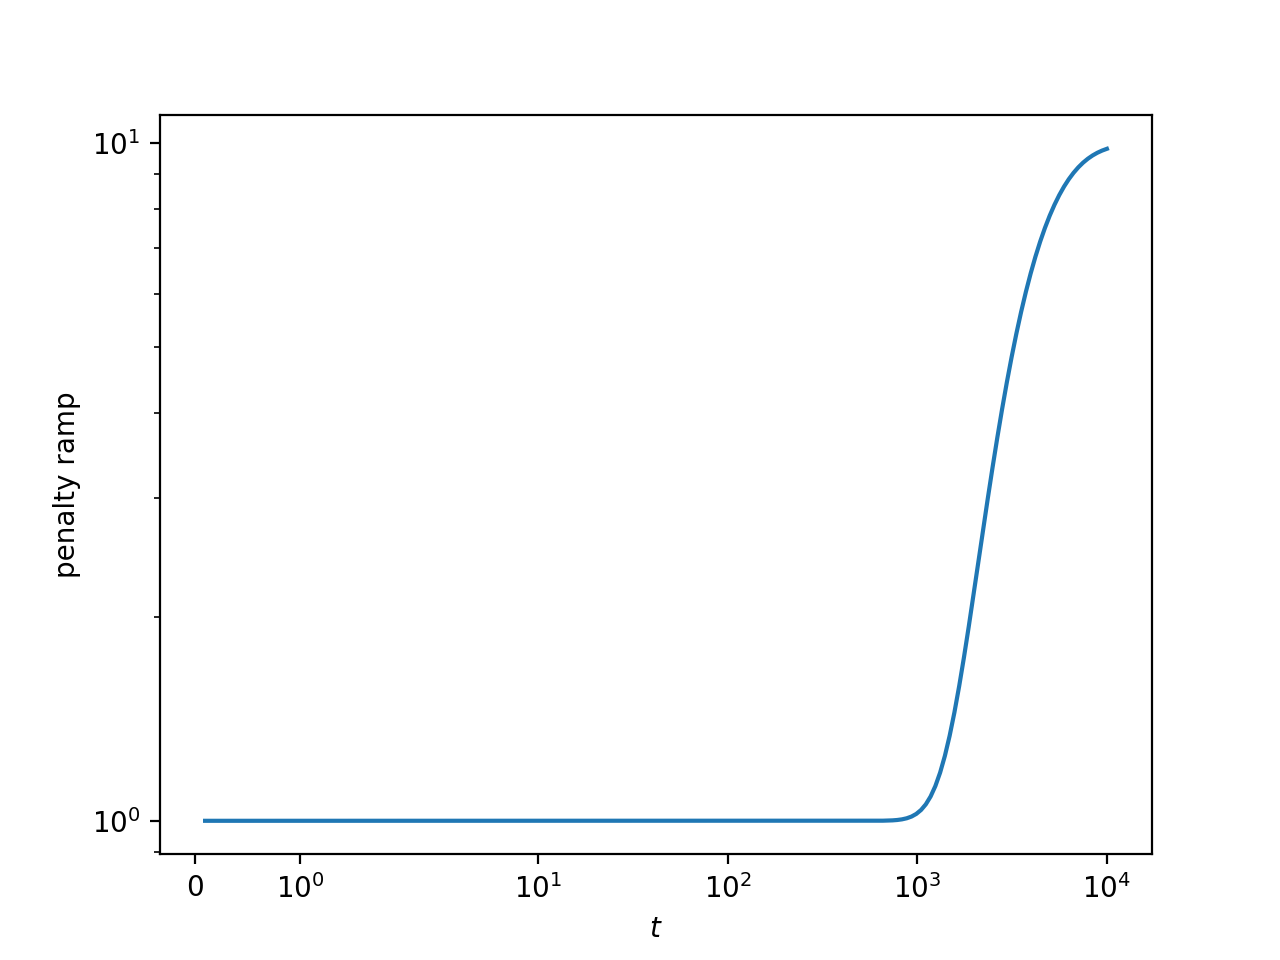

<IPython.core.display.Javascript object>


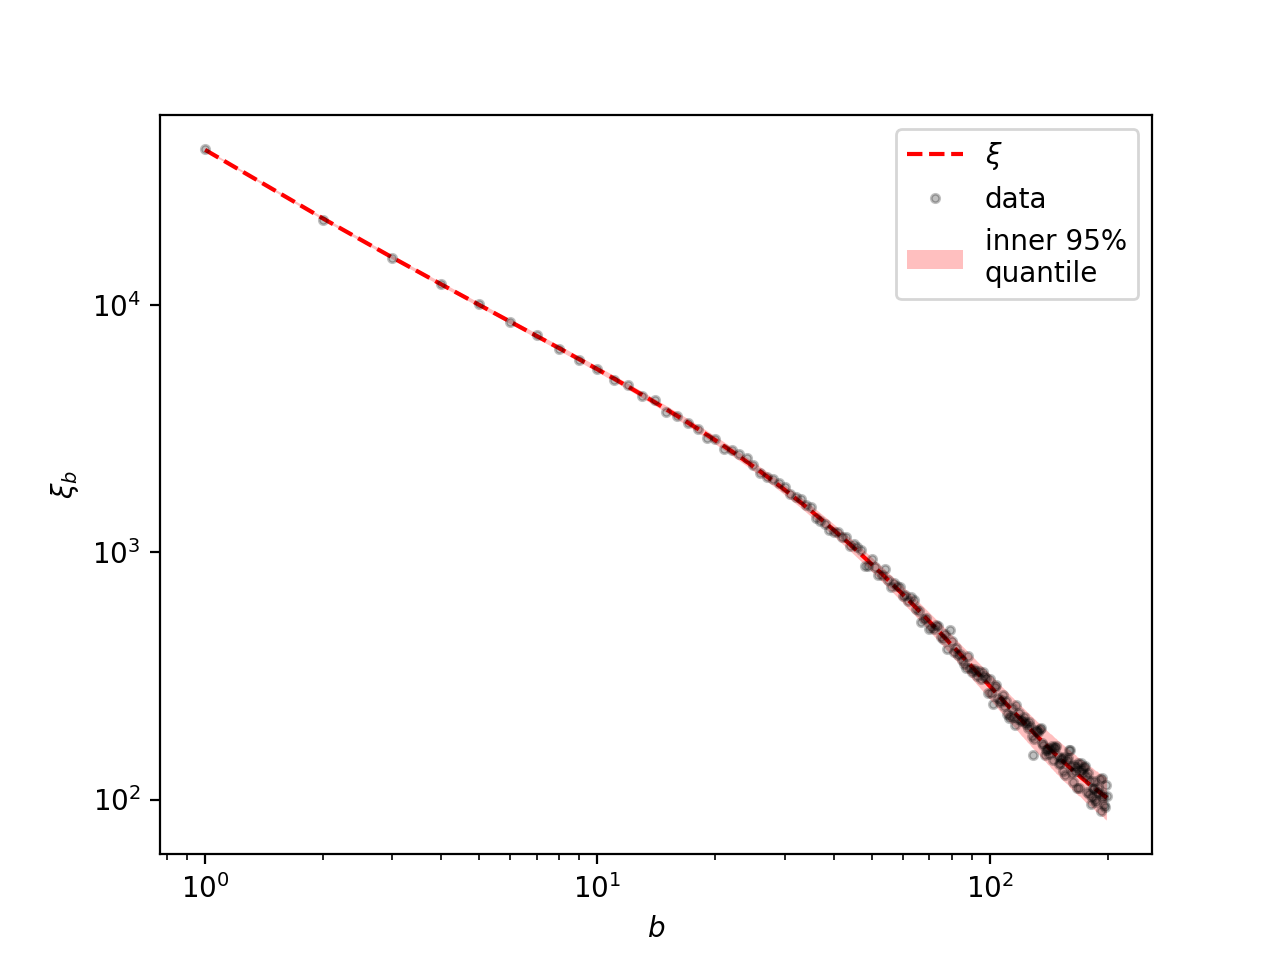

In [6]:
λ = 1e-1
α = .5
h = 1e1
s = .001
steps = 10000
tic = time.time()
history_inferred = sfs_TCC.infer_μ(η, λ=λ, α=α, h=h, steps=steps)
toc = time.time()
print(f'elapsed time {toc - tic:.2f}')

fig = history_TCC.plot(label='TCC>TTC true')
history_inferred.plot(fig=fig, label='TCC>TTC inferred')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(η.change_points, np.diag(sfs_TCC.Γ(η, h=h))[1:])
plt.xlabel('$t$')
plt.xscale('symlog')
plt.yscale('log')
plt.ylabel('penalty ramp')
plt.show()

plt.figure()
sfs_TCC.plot(JointHistory(η, μ_TCC))
plt.show()